<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Juego_con_monedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se tiene un tablero circular, dividido en 4 sectores. Lanzamos 2 monedas y avanzamos en sentido horario la cantidad de caras que aparezcan. Si repetimos el procedimiento...
¿Son todos los sectores igualmente proables cuando pase mucho tiempo

# Solución analítica
## Cadena de Markov

$$P = \begin{bmatrix}
\frac{1}{4} & \frac{1}{2} & 0 & \frac{1}{4}\\
0 & \frac{1}{4} & \frac{1}{4} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{4} & \frac{1}{4} & 0\\
\frac{1}{4} & 0 & \frac{1}{2} & \frac{1}{4}
\end{bmatrix}$$
La cual representa la probabilidad de transición de una casilla a otra

Se recuelve el conjunto de ecuaciones
$$\pi P = \pi, \sum\pi_i = 1$$
Con
$$\pi = [\pi_1, \pi_2, \pi_3, \pi_4]$$

Así, se obtiene la distribución estacionaria:

$$
\pi_1 = \pi_2 = \pi_3 = \pi_4 = \frac{1}{4}
$$

De esta manera, podemos concluir que a largo plazo, todas las casillas son igual de porbables

# Solución por simulación

### Variable aleatoria
La variable aleatoria de la posición de la ficha

In [2]:
from random import random, randint
import numpy as np
import matplotlib.pyplot as plt

Función que simula $n$ tiros en un tablero, retorna un diccionario con la cantidad de veces que se estuvo en cierta casilla

In [3]:
def tiros(tablero, casilla, n):
  for i in range(n):
    tablero[casilla%4] += 1
    cara = sum(np.random.binomial(n=1, p=0.5, size=2))
    casilla += cara
  return tablero

Gráfica de convergencia con hasta 1,000 tiros

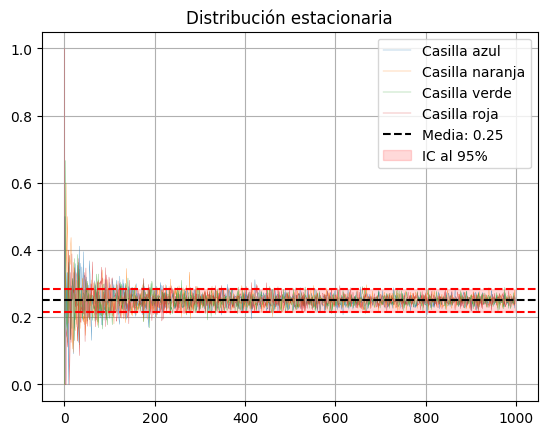

In [13]:
x = []
for i in range(1, 1000):
  tablero = {0:0, 1:0, 2:0, 3:0}
  casilla = randint(0, 3)
  #print(f"{i}\tmovimientos: {np.array(list(tiros(tablero, casilla, i).values()))/i}")
  x.append(np.array(list(tiros(tablero, casilla, i).values()))/i)

mu = np.mean(x)
s = np.std(x)

plt.plot(x, linewidth = 0.2, label = ("Casilla azul", "Casilla naranja", "Casilla verde", "Casilla roja"))
plt.axhline(y = np.mean(x), color = "k", linestyle = "--", label = f"Media: {mu}")
plt.axhline(y = np.mean(x) + s, color = "r", linestyle = "--")
plt.axhline(y = np.mean(x) - s, color = "r", linestyle = "--")
plt.fill_between(range(len(x)), np.mean(x) + s, np.mean(x) - s, color = "r", alpha = 0.15, label = "IC al 95%")
plt.legend(loc = "best")
plt.title("Distribución estacionaria")
plt.grid(True)
plt.show()